In [10]:
from keras.models import Sequential            # 케라스의 Sequential()을 임포트
from keras.layers import Dense                 # 케라스의 Dense()를 임포트
from keras import optimizers                   # 케라스의 옵티마이저(학습 방법)를 임포트
import numpy as np                             # Numpy를 임포트

In [11]:
# 1. 데이터
X = np.array([1, 2, 3, 4, 5, 6, 7 ,8 ,9, 10])             # 공부하는 시간(입력데이터)
Y = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])   # 각 공부하는 시간에 맵핑되는 성적(라벨 / 실제값)

In [12]:
x_train = X[ : 7]                                         # 학습 데이터
y_train = Y[ : 7]

x_test = X[7 : ]                                          # 테스트 데이터
y_test = Y[7 : ]

In [13]:
# 2. 모델 구성
model=Sequential()                                       # 입력층, 중간층, 출력층을 순서적으로 설계하겠다.
model.add(Dense(1, input_dim = 1, activation ='linear'))    # 입력값(X) / 예측값(Y’) /  Y’ = wX
model.summary()                                          # 모델 구성 보여줌

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 3. 학습 과정 설정
# 학습 방법 : sgd(stocastic gradient descent) / 학습률 : 0.01 / Cost function : mse
# 목표 : 오차를 최소하하기 위해 w, b를 학습
model.compile(optimizer = optimizers.SGD(lr = 0.01), loss='mse')

In [15]:
# 4. 학습(학습 데이터로 모델 학습 / 테스트 데이터로 모델 검증[모델 평가])
model.fit(x_train, y_train, epochs = 200, validation_data=(x_test, y_test))

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2155.2205 - val_loss: 3075.7585
Epoch 2/200
1/1 [==============================] - 0s 91ms/step - loss: 735.1889 - val_loss: 1093.3444
Epoch 3/200
1/1 [==============================] - 0s 134ms/step - loss: 251.1319 - val_loss: 399.5541
Epoch 4/200
1/1 [==============================] - 0s 144ms/step - loss: 86.1252 - val_loss: 152.5634
Epoch 5/200
1/1 [==============================] - 0s 124ms/step - loss: 29.8746 - val_loss: 62.2609
Epoch 6/200
1/1 [==============================] - 0s 151ms/step - loss: 10.6962 - val_loss: 27.9200
Epoch 7/200
1/1 [==============================] - 0s 133ms/step - loss: 4.1549 - val_loss: 14.1384
Epoch 8/200
1/1 [==============================] - 0s 97ms/step - loss: 1.9212 - val_loss: 8.2280
Epoch 9/200
1/1 [==============================] - 0s 81ms/step - loss: 1.1559 - val_loss: 5.5023
Epoch 10/200
1/1 [==============================] - 0s 109ms/step - loss: 0.8912 - val_loss:

In [16]:
# 모델 평가
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.6043


0.6043168902397156

In [17]:
# 예측
predit = model.predict(x_test)

for i in range(0,len(predit)) :
    print("예측값 : ", predit[i], "\t실제값 : ", y_test[i])

1/1 [==============================] - 0s 47ms/step
예측값 :  [79.426216] 	실제값 :  80
예측값 :  [89.23797] 	실제값 :  90
예측값 :  [99.04972] 	실제값 :  100


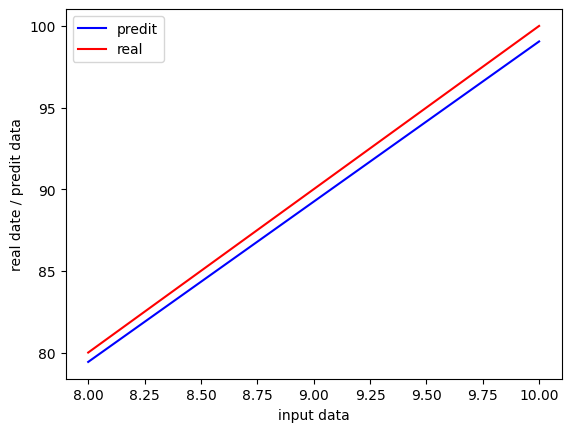

In [18]:
import matplotlib.pyplot as plt
plt.plot(x_test, predit, 'b', label='predit')   # 예측값 그래프
plt.plot(x_test, y_test, 'r', label= 'real')    # 실제값 그래프
plt.xlabel('input data')
plt.ylabel('real date / predit data')
plt.legend(loc='upper left')
plt.show()